In [2]:
import matplotlib.pyplot as plt
import numpy as np

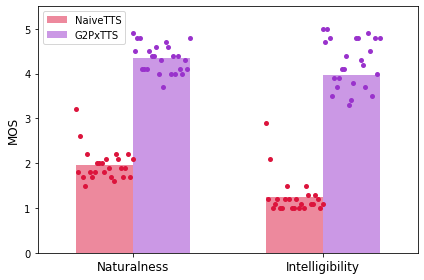

[0 1]


In [87]:
data = [1.968,1.252,4.344,3.964]
data_points = "		3.2	2.9	4.9	5	1.8	1.2	4.5	4.7	2.6	2.1	4.8	5	1.7	1	4.8	4.8	1.5	1.1	4.1	3.5	2.2	1.2	4.1	3.9	1.8	1	4.1	3.7	1.7	1	4.5	3.9	1.8	1.2	4.4	4.1	2	1.5	4.4	4.1	2	1.2	4.6	4.4	2	1	4	3.3	1.8	1	4.3	3.4	2.1	1.2	3.7	3.8	1.9	1	4.7	4.8	1.7	1.1	4.6	4.8	1.6	1	4	4.3	2.2	1.5	4.4	4.2	2.1	1.3	4	3.7	1.9	1.1	4.4	4.9	1.7	1.1	4.1	4.5	1.9	1.3	4	3.5	2.2	1.2	4.3	4.8	1.7	1	4.1	4	2.1	1.1	4.8	4.8																				"
data_points = data_points.split()
arr_points = np.zeros([4,25])
arr_points[0,:]=data_points[0::4].copy()
arr_points[1,:]=data_points[1::4].copy()
arr_points[2,:]=data_points[2::4].copy()
arr_points[3,:]=data_points[3::4].copy()

nat_points = [arr_points[0,:], arr_points[2,:]]
intel_points = [arr_points[1,:], arr_points[3,:]]



# print(arr_points)
# print(arr_points.shape)
# print(data_points)

labels = ['Naturalness', 'Intelligibility']
Naturalness = [data[0], data[1]]
Intelligibility = [data[2], data[3]]

x = np.arange(len(labels))  # the label locations
#x= [0, 1]
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Naturalness, width, label='NaiveTTS',color="crimson",alpha=0.5)

rects2 = ax.bar(x + width/2, Intelligibility, width, label='G2PxTTS',alpha=0.5, color="darkorchid")

plt.scatter(np.linspace(-width, x[0], 25),arr_points[0,:],linewidth=2, marker ='.',color="crimson")
plt.scatter(np.linspace(x[0], width, 25),arr_points[2,:],linewidth=2, marker ='.', color="darkorchid")
plt.scatter(np.linspace(1-width, x[1], 25),arr_points[1,:],linewidth=2, marker ='.',color="crimson")
plt.scatter(np.linspace(x[1], 1+width, 25),arr_points[3,:],linewidth=2, marker ='.',color="darkorchid")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MOS',fontsize=12)
plt.ylim(top=5.5)
plt.xlim(right=1.5)
plt.xlim(left=-.5)
#ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels,fontsize=12)
ax.legend(loc="upper left")

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('../MOS_graphs.pdf')
plt.show()
print(x)


In [90]:
# reshaping the array from 3D matrice to 2D matrice.
arr_from_file = np.loadtxt("eval_results/test_eh256512.csv")
print(arr_from_file.shape)
loadedOriginal = arr_from_file.reshape(2, 100, 6)
e256h256n2d01 = loadedOriginal[0,]
e512h512n2d01 = loadedOriginal[1,]
combined_models_losses = loadedOriginal
combined_best_epochs_ehvary = [('G2P-e256h256n2d0.1', 73), ('G2P-e512h512n2d0.1', 30)]

(200, 6)
(100, 6)


In [94]:
# reshaping the array from 3D matrice to 2D matrice.
arr_from_file = np.loadtxt("eval_results/test_vary_eh_together.csv")
print(arr_from_file.shape)
loadedOriginal = arr_from_file.reshape(3, 100, 6)
e6464n2d01 = loadedOriginal[0,]
e128128n2d01 = loadedOriginal[1,]
combined_best_epochs_ehvary = [('G2P-e64h64n2d0.1', 82), ('G2P-e128h128n2d0.1', 31),('G2P-e256h256n2d0.1', 73), ('G2P-e512h512n2d0.1', 30)]

(300, 6)


Train Losses


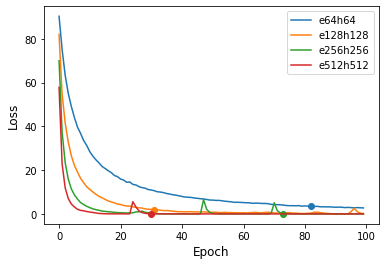

In [109]:
print("Train Losses")
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('Loss',fontsize=12)
combined_models_losses = np.array((e6464n2d01, e128128n2d01, e256h256n2d01, e512h512n2d01))
ax = plt.gca()
for (i,j) in zip(range(len(combined_models_losses)), combined_best_epochs_ehvary):
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(combined_models_losses[i,:,0], combined_models_losses[i,:,1], label=j[0].replace("n2d0.1","").replace("G2P-",""), color=color)
    plt. plot(j[1], combined_models_losses[i,j[1],1],linewidth=2, marker ='o', color=color)
plt.locator_params(axis="x", integer=True, tight=True)
plt.legend(loc="upper right")
plt.show()

Eval loss


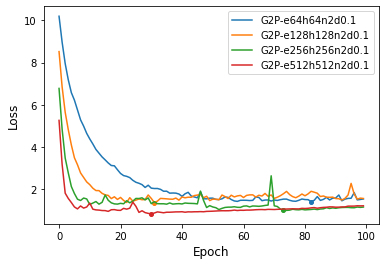

In [110]:
print("Eval loss")
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('Loss',fontsize=12)
combined_models_losses = np.array((e6464n2d01, e128128n2d01, e256h256n2d01, e512h512n2d01))
ax = plt.gca()
for (i,j) in zip(range(len(combined_models_losses)), combined_best_epochs_ehvary):
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(combined_models_losses[i,:,0], combined_models_losses[i,:,2], label=j[0], color=color)
    plt. plot(j[1], combined_models_losses[i,j[1],2],markersize=4, marker ='o', color=color)
plt.locator_params(axis="x", integer=True, tight=True)
plt.legend(loc="upper right")
plt.show()

Accuracy


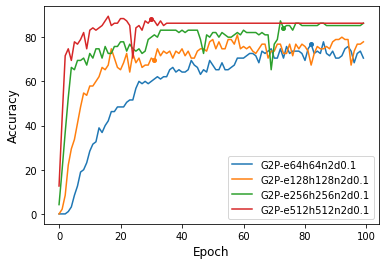

In [111]:
print("Accuracy")
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
combined_models_losses = np.array((e6464n2d01, e128128n2d01, e256h256n2d01, e512h512n2d01))
ax = plt.gca()
for (i,j) in zip(range(len(combined_models_losses)), combined_best_epochs_ehvary):
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(combined_models_losses[i,:,0], 100*combined_models_losses[i,:,3], label=j[0], color=color)
    plt. plot(j[1], 100*combined_models_losses[i,j[1],3],markersize=4, marker ='o', color=color)
plt.locator_params(axis="x", integer=True, tight=True)
plt.legend(loc="lower right")
plt.show()

PER


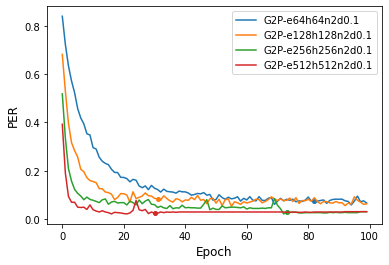

In [112]:
print("PER")
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('PER',fontsize=12)
combined_models_losses = np.array((e6464n2d01, e128128n2d01, e256h256n2d01, e512h512n2d01))
ax = plt.gca()
for (i,j) in zip(range(len(combined_models_losses)), combined_best_epochs_ehvary):
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(combined_models_losses[i,:,0], combined_models_losses[i,:,4], label=j[0], color=color)
    plt. plot(j[1], combined_models_losses[i,j[1],4],markersize=4, marker ='o', color=color)
plt.locator_params(axis="x", integer=True, tight=True)
plt.legend(loc="upper right")
plt.show()

Incorrect phonemenic sequences
0
1
2
3


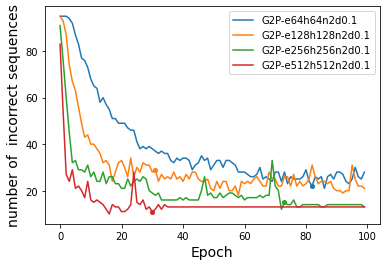

In [114]:
print("Incorrect phonemenic sequences")
plt.xlabel('Epoch',fontsize=14)
plt.ylabel('number of  incorrect sequences',fontsize=14)
combined_models_losses = np.array((e6464n2d01, e128128n2d01, e256h256n2d01, e512h512n2d01))
ax = plt.gca()
for (i,j) in zip(range(len(combined_models_losses)), combined_best_epochs_ehvary):
    print(i)
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(combined_models_losses[i,:,0], combined_models_losses[i,:,5], label=j[0], color=color)
    plt. plot(j[1], combined_models_losses[i,j[1],5],markersize=4, marker ='o', color=color)
plt.locator_params(axis="x", integer=True, tight=True)
plt.legend(loc="upper right")
plt.show()